<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Text Representation </center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

Natural Language Processing is a branch of artificial intelligence that deals with human language to make a system able to understand and respond to language. Data being the most important part of any data science project should always be represented in a way that helps easy understanding and modeling. It is said that when we provide very good features to bad models and bad features to well-optimized models then bad models will perform far better than an optimized model.

# Table of Contents

* One-Hot Encoding
* Bag of words Technique
* N-Grams
* TF-IDF
* Word embeddings

In [1]:
!pip3 install watermark


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings 
warnings.filterwarnings ('ignore')

import os 
import gzip 
from collections import Counter 
from pprint import pprint

import pandas as pd 
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt

np.random.seed(123)

import string 
import nltk 
from nltk.corpus import stopwords 
from nltk.text import TextCollection 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics.association import BigramAssocMeasures

import sklearn 
from sklearn.manifold import TSNE 
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm 
tqdm.pandas()

import watermark

%load_ext watermark 
%matplotlib inline

In [3]:
%watermark 

Last updated: 2024-09-03T10:18:59.999860-04:00

Python implementation: CPython
Python version       : 3.12.1
IPython version      : 8.23.0

Compiler    : MSC v.1937 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 151 Stepping 2, GenuineIntel
CPU cores   : 24
Architecture: 64bit



In [4]:
text = '''Mary had a little lamb, little lamb, 
little lamb. "Mary' had a little lamb 
whose fleece was white as snow. 
And everywhere that Mary went 
Mary went, MARY went. Everywhere 
that mary went, 
The lamb was sure to go
'''

## Tokenization

In [5]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aldou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
tokens= nltk.word_tokenize(text, 'english')

In [7]:
pprint(tokens)

['Mary',
 'had',
 'a',
 'little',
 'lamb',
 ',',
 'little',
 'lamb',
 ',',
 'little',
 'lamb',
 '.',
 '``',
 'Mary',
 "'",
 'had',
 'a',
 'little',
 'lamb',
 'whose',
 'fleece',
 'was',
 'white',
 'as',
 'snow',
 '.',
 'And',
 'everywhere',
 'that',
 'Mary',
 'went',
 'Mary',
 'went',
 ',',
 'MARY',
 'went',
 '.',
 'Everywhere',
 'that',
 'mary',
 'went',
 ',',
 'The',
 'lamb',
 'was',
 'sure',
 'to',
 'go']


In [8]:
sentences=nltk.sent_tokenize(text,'english')

In [9]:
print(tokens[5])
print(tokens[12])
print(tokens[13])

,
``
Mary


In [10]:
tokens=nltk.tokenize.WordPunctTokenizer().tokenize(text)

In [11]:
print(tokens[5])
print(tokens[12])
print(tokens[13])
print(tokens[14])

,
"
Mary
'


In [12]:
def tokenize(text, preserve_case=True):
    punctuation = set(string.punctuation) 
    text_words = []
    
    for word in nltk.tokenize.WordPunctTokenizer().tokenize(text):
        # Remove any token that corresponds to a punctuation character 
        if word in punctuation:
            continue
        
        # Are we keeping the original letter case or # using lowercase throughout? 
        if preserve_case:
            text_words.append(word) 
        else:
            text_words.append(word.lower())
    return text_words

In [13]:
text_words = tokenize(text, False)

In [14]:
text_words

['mary',
 'had',
 'a',
 'little',
 'lamb',
 'little',
 'lamb',
 'little',
 'lamb',
 'mary',
 'had',
 'a',
 'little',
 'lamb',
 'whose',
 'fleece',
 'was',
 'white',
 'as',
 'snow',
 'and',
 'everywhere',
 'that',
 'mary',
 'went',
 'mary',
 'went',
 'mary',
 'went',
 'everywhere',
 'that',
 'mary',
 'went',
 'the',
 'lamb',
 'was',
 'sure',
 'to',
 'go']

## One-Hot Encoding

In [15]:
one_hot = pd.get_dummies(text_words)

In [16]:
temp=one_hot.astype('str')
temp[temp=='0']=""
temp=pd.DataFrame(temp)
temp

,a,and,as,everywhere,fleece,go,had,lamb,little,mary,snow,sure,that,the,to,was,went,white,whose
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [17]:
word_dict = dict(zip(one_hot.columns, np.arange(one_hot.shape[1])))
word_dict

{'a': 0,
 'and': 1,
 'as': 2,
 'everywhere': 3,
 'fleece': 4,
 'go': 5,
 'had': 6,
 'lamb': 7,
 'little': 8,
 'mary': 9,
 'snow': 10,
 'sure': 11,
 'that': 12,
 'the': 13,
 'to': 14,
 'was': 15,
 'went': 16,
 'white': 17,
 'whose': 18}

## Bag of Words

In [18]:
pd.DataFrame(one_hot.sum(), columns=['Count'])

,Count
a,2
and,1
as,1
everywhere,2
fleece,1
go,1
had,2
lamb,5
little,4
mary,6


## Stopwords

NLTK provides stopwords for 23 different languages 

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aldou\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words('english'))
tokens = tokenize(text) 
filtered_sentence = [word if word.lower() not in stop_words else "" for word in tokens] 
pd.DataFrame((zip(tokens, filtered_sentence)), columns=['Original', 'Filtered']).set_index( 'Original')

,Filtered
Original,
Mary,Mary
had,
a,
little,little
lamb,lamb
little,little
lamb,lamb
little,little
lamb,lamb


## TF/IDF

In [21]:
corpus = nltk.sent_tokenize(text)

In [22]:
corpus

['Mary had a little lamb, little lamb, \nlittle lamb.',
 '"Mary\' had a little lamb \nwhose fleece was white as snow.',
 'And everywhere that Mary went \nMary went, MARY went.',
 'Everywhere \nthat mary went, \nThe lamb was sure to go']

In [23]:
len(corpus)

4

In [24]:
corpus = [tokenize(doc, preserve_case=False) for doc in corpus]

In [25]:
corpus

[['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb'],
 ['mary',
  'had',
  'a',
  'little',
  'lamb',
  'whose',
  'fleece',
  'was',
  'white',
  'as',
  'snow'],
 ['and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went'],
 ['everywhere',
  'that',
  'mary',
  'went',
  'the',
  'lamb',
  'was',
  'sure',
  'to',
  'go']]

In [26]:
nlp = TextCollection(corpus)

<Axes: xlabel='Samples', ylabel='Counts'>

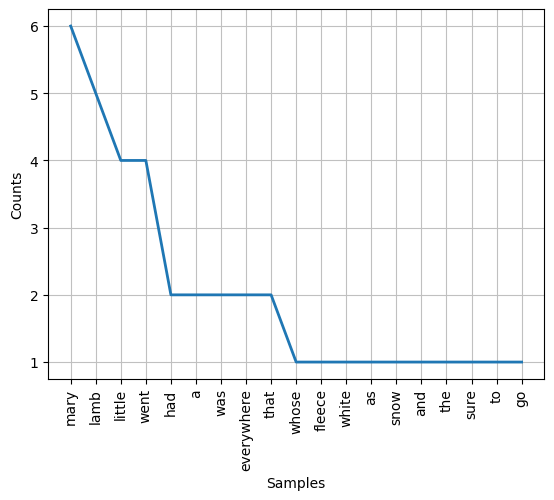

In [27]:
nlp.plot()

In [28]:
nlp.tf_idf('Mary', corpus[3])

0.0

In [29]:
TFIDF = []

for doc in corpus:
    current = {}
    for token in doc:
        current[token] = nlp.tf_idf(token, doc)
    
    TFIDF.append(current)

In [30]:
TFIDF

[{'mary': 0.0,
  'had': 0.07701635339554948,
  'a': 0.07701635339554948,
  'little': 0.23104906018664842,
  'lamb': 0.09589402415059362},
 {'mary': 0.0,
  'had': 0.06301338005090412,
  'a': 0.06301338005090412,
  'little': 0.06301338005090412,
  'lamb': 0.026152915677434625,
  'whose': 0.12602676010180824,
  'fleece': 0.12602676010180824,
  'was': 0.06301338005090412,
  'white': 0.12602676010180824,
  'as': 0.12602676010180824,
  'snow': 0.12602676010180824},
 {'and': 0.15403270679109896,
  'everywhere': 0.07701635339554948,
  'that': 0.07701635339554948,
  'mary': 0.0,
  'went': 0.23104906018664842},
 {'everywhere': 0.06931471805599453,
  'that': 0.06931471805599453,
  'mary': 0.0,
  'went': 0.06931471805599453,
  'the': 0.13862943611198905,
  'lamb': 0.028768207245178087,
  'was': 0.06931471805599453,
  'sure': 0.13862943611198905,
  'to': 0.13862943611198905,
  'go': 0.13862943611198905}]

## N-Grams

In [31]:
def get_ngrams(text, length):
    from nltk.util import ngrams
    
    n_grams = ngrams(tokenize(text), length)
    return [' '.join(grams) for grams in n_grams]

In [32]:
get_ngrams(text.lower(), 2)

['mary had',
 'had a',
 'a little',
 'little lamb',
 'lamb little',
 'little lamb',
 'lamb little',
 'little lamb',
 'lamb mary',
 'mary had',
 'had a',
 'a little',
 'little lamb',
 'lamb whose',
 'whose fleece',
 'fleece was',
 'was white',
 'white as',
 'as snow',
 'snow and',
 'and everywhere',
 'everywhere that',
 'that mary',
 'mary went',
 'went mary',
 'mary went',
 'went mary',
 'mary went',
 'went everywhere',
 'everywhere that',
 'that mary',
 'mary went',
 'went the',
 'the lamb',
 'lamb was',
 'was sure',
 'sure to',
 'to go']

## Collocations 

In [33]:
bigrams = BigramCollocationFinder.from_words(tokenize(text, False))
scored = bigrams.score_ngrams(BigramAssocMeasures.likelihood_ratio)

In [34]:
scored

[(('little', 'lamb'), 20.789064969512463),
 (('mary', 'went'), 18.154919185356587),
 (('everywhere', 'that'), 15.777294140200038),
 (('had', 'a'), 15.777294140200038),
 (('a', 'little'), 10.232116695720478),
 (('as', 'snow'), 9.301260258907092),
 (('snow', 'and'), 9.301260258907092),
 (('sure', 'to'), 9.301260258907092),
 (('to', 'go'), 9.301260258907092),
 (('white', 'as'), 9.301260258907092),
 (('whose', 'fleece'), 9.301260258907092),
 (('mary', 'had'), 8.139124120662284),
 (('that', 'mary'), 8.139124120662284),
 (('and', 'everywhere'), 6.528671536667327),
 (('fleece', 'was'), 6.528671536667327),
 (('was', 'sure'), 6.528671536667327),
 (('was', 'white'), 6.528671536667327),
 (('went', 'the'), 4.802579101956642),
 (('lamb', 'whose'), 4.297236023525216),
 (('the', 'lamb'), 4.297236023525216),
 (('lamb', 'little'), 3.850143362325084),
 (('went', 'mary'), 3.065215528887738),
 (('went', 'everywhere'), 2.196764352889584),
 (('lamb', 'was'), 1.7502532877068806),
 (('lamb', 'mary'), 0.088193

## Word Embeddings 

In [37]:
import numpy as np

# Load GloVe embeddings from file
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

# Path to your GloVe file (change this path to where you have the glove.6B.50d.txt file)
glove_file_path = 'glove.6B.50d.txt'

# Load the GloVe embeddings
embeddings_index = load_glove_embeddings(glove_file_path)
print(f"Loaded {len(embeddings_index)} word vectors.")

Loaded 400000 word vectors.


In [38]:
# Example word vector lookup
word = 'teacher'
vector = embeddings_index.get(word)
print(f"Vector for '{word}': {vector}")

Vector for 'teacher': [-0.94921   0.98376  -0.57502  -1.3822    0.78417   0.32843  -0.43651
  0.20278  -0.26856   0.29097   0.21552  -0.12359   0.18165  -0.20466
  0.28223  -0.81792  -0.43124   1.0035    0.5199    0.51358   0.22949
  1.3671   -0.49405   0.70599   0.63063  -1.7086   -0.070777 -1.0876
 -0.8005    0.051295  2.3423   -0.29156  -0.24     -0.58339   0.76433
  0.46498   0.19742   0.67336   1.105     0.13777  -0.18365   0.39083
 -0.22634   0.094744  0.45203  -0.62911   0.52827  -0.26174   0.020753
  0.9038  ]


In [39]:
# Find the most similar words using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_words(word, embeddings_index, top_n=5):
    word_vector = embeddings_index.get(word)
    if word_vector is None:
        return []

    similarities = {}
    for other_word, other_vector in embeddings_index.items():
        if other_word == word:
            continue
        similarity = cosine_similarity([word_vector], [other_vector])[0][0]
        similarities[other_word] = similarity

    # Sort by similarity
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_similarities[:top_n]

similar_words = find_similar_words(word, embeddings_index)
print(f"Words similar to '{word}': {similar_words}")

Words similar to 'teacher': [('student', 0.8962056), ('graduate', 0.8133385), ('teaching', 0.81286174), ('taught', 0.8075725), ('teaches', 0.7871847)]


### Exploring Semantic Relationships with GloVe: An Example of Vector Arithmetic in Word Embeddings

In [40]:
import numpy as np

# Function to load GloVe vectors
def load_glove_vectors(glove_file_path):
    word_vectors = {}
    with open(glove_file_path, 'r', encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            word_vectors[word] = vector
    return word_vectors

In [41]:
# Function to compute cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

In [42]:
# Function to find the most similar word vector
def find_closest_word(word_vectors, vector, exclude_words=[]):
    closest_word = None
    max_similarity = -1
    
    for word, word_vec in word_vectors.items():
        if word in exclude_words:
            continue
        similarity = cosine_similarity(vector, word_vec)
        if similarity > max_similarity:
            max_similarity = similarity
            closest_word = word
    
    return closest_word

In [43]:
# Load GloVe vectors (you'll need to update the path to the GloVe file)
glove_file_path = 'glove.6B.50d.txt'  # Update with the path to your GloVe file
word_vectors = load_glove_vectors(glove_file_path)

In [44]:
# Perform the arithmetic: king - man + woman
king_vector = word_vectors['king']
man_vector = word_vectors['man']
woman_vector = word_vectors['woman']

In [45]:
# Calculate the new vector
result_vector = king_vector - man_vector + woman_vector

In [46]:
# Find the closest word
closest_word = find_closest_word(word_vectors, result_vector, exclude_words=['king', 'man', 'woman'])

print(f"The word closest to 'king - man + woman' is: {closest_word}")

The word closest to 'king - man + woman' is: queen
